# Distributions : several way to set the parameters

The goal of this example is to show how to set the parameters of a distribution given an amplitude parameter or given a mean and a variance.

In the following table, we set the amplitude parameter to $a$. Then we compute the parameters of the distribution given $a$, so that the mean is zero. 

For the `Normal` distribution, we assume that the amplitude defines the 99.73% confidence interval. We assume that the corresponding amplitude is $3\sigma$.

|Distribution|Parameters|
|--|--|
|Normal|$\mu=0$, $\sigma=a/3$|
|Uniform|$min=-a$, $max=a$|
|Triangular|$min=-a$, $mode=0.$, $max=a$|

In [1]:
import openturns as ot
import numpy as np

In [2]:
def drawPDFWithLegendZeroMean(distribution,color):
    '''
    Draw the PDF of the distribution with given color.
    Fill the legend with the mean and the variance.
    '''
    graph = distribution.drawPDF()
    variance = distribution.getCovariance()[0,0]
    graph.setColors([color])
    name = distribution.getClassName()[0:2]
    graph.setLegends(["%s, V=%.3f" % (name, variance)])
    return graph

## Given an amplitude parameter, define the distribution

In [3]:
mu = 0.
amplitude = 1.

In [4]:
sigma = np.sqrt(amplitude)/3 # Gaussienne
n = ot.Normal(0.,sigma)

In [5]:
u = ot.Uniform(-amplitude,amplitude)

In [6]:
t = ot.Triangular(-amplitude,0.,amplitude)

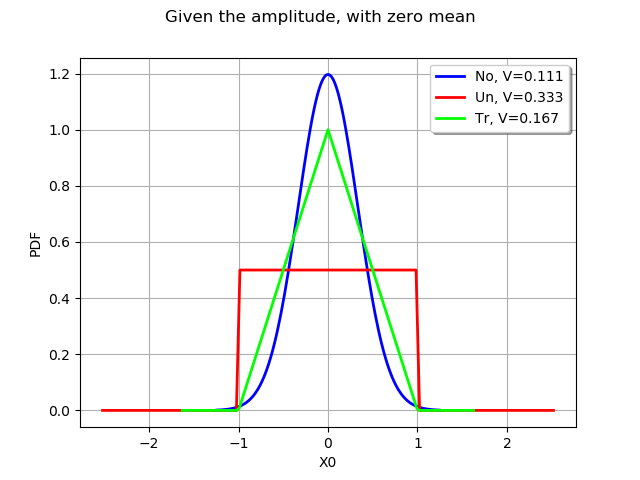

In [7]:
graph = drawPDFWithLegendZeroMean(n,"blue")
graphU = drawPDFWithLegendZeroMean(u,"red")
graph.add(graphU)
graphT = drawPDFWithLegendZeroMean(t,"green")
graph.add(graphT)
graph.setTitle("Given the amplitude, with zero mean")
graph

## Compute the parameters of a Triangular with given mean and variances

In [8]:
def fitMeanAndVarianceTriangular(parameters):
    '''
    Compute the squared euclidian distance between the 
    target mean and variance and the mean and variance of the 
    Triangular distribution with given parameters.
    '''
    a,m,b = parameters
    t = ot.Triangular(a,m,b)
    mean = t.getMean()[0]
    variance = t.getCovariance()[0,0]
    cost = (targetmean-mean)**2 + (targetvariance-variance)**2
    return [cost]

In [9]:
objectiveTriangular = ot.PythonFunction(3,1,fitMeanAndVarianceTriangular)

In [10]:
targetmean = 0.
targetvariance = 1.
startingPoint = ot.Triangular().getParameter()
startingPoint

class=Point name=Unnamed dimension=3 values=[-1,0,1]

In [11]:
dim = objectiveTriangular.getInputDimension()
bounds = ot.Interval([-5.]*dim, [5.] * dim)
problem = ot.OptimizationProblem(objectiveTriangular)
problem.setMinimization(True)
problem.setBounds(bounds)

In [12]:
algo = ot.NLopt()
algo.setProblem(problem)
algo.setStartingPoint(startingPoint)
algo.run()

In [13]:
result = algo.getResult()
optimalParameters = result.getOptimalPoint()
optimalParameters

class=Point name=Unnamed dimension=3 values=[-2.44949,7.42215e-12,2.44949]

In [14]:
a, m, b = optimalParameters
t = ot.Triangular(a, m, b)

## Compute the parameters of a Uniform with given mean and variances

In [15]:
def fitMeanAndVarianceUniform(parameters):
    '''
    Compute the squared euclidian distance between the 
    target mean and variance and the mean and variance of the 
    Uniform distribution with given parameters.
    '''
    a,b = parameters
    t = ot.Uniform(a,b)
    mean = t.getMean()[0]
    variance = t.getCovariance()[0,0]
    cost = (targetmean-mean)**2 + (targetvariance-variance)**2
    return [cost]

In [16]:
objectiveUniform = ot.PythonFunction(2,1,fitMeanAndVarianceUniform)

In [17]:
targetmean = 0.
targetvariance = 1.
startingPoint = ot.Uniform().getParameter()
startingPoint

class=Point name=Unnamed dimension=2 values=[-1,1]

In [18]:
dim = objectiveUniform.getInputDimension()
bounds = ot.Interval([-5.]*dim, [5.] * dim)
problem = ot.OptimizationProblem(objectiveUniform)
problem.setMinimization(True)
problem.setBounds(bounds)

In [19]:
algo = ot.NLopt()
algo.setProblem(problem)
algo.setStartingPoint(startingPoint)
algo.run()

In [20]:
result = algo.getResult()
optimalParameters = result.getOptimalPoint()
optimalParameters

class=Point name=Unnamed dimension=2 values=[-1.73205,1.73205]

In [21]:
a, b = optimalParameters
u = ot.Uniform(a, b)

In [22]:
parameter = t.getParameter()
parameter

class=Point name=Unnamed dimension=3 values=[-2.44949,7.42215e-12,2.44949]

## Compare distributions

In [23]:
def drawPDFWithLegendParameters(distribution,color):
    '''
    Draw the PDF of the distribution with given color.
    Fill the legend with the parameters.
    '''
    graph = distribution.drawPDF()
    parameter = distribution.getParameter()
    graph.setColors([color])
    name = distribution.getClassName()[0:2]
    label = ['%.1f' % (i) for i in parameter]
    graph.setLegends(["%s, %s" % (name, label)])
    return graph

In [24]:
sigma = 1.
n = ot.Normal(mu,sigma) # Normal

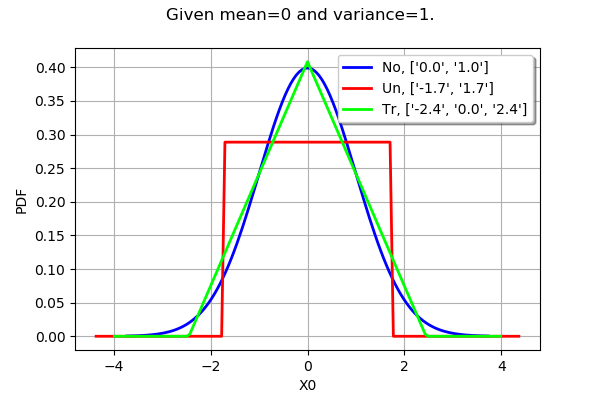

In [25]:
graph = drawPDFWithLegendParameters(n,"blue")
graphU = drawPDFWithLegendParameters(u,"red")
graph.add(graphU)
graphT = drawPDFWithLegendParameters(t,"green")
graph.add(graphT)
graph.setTitle("Given mean=0 and variance=1.")
graph